In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [88]:
df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:1000,:]
# df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [89]:
df['condition'] = df['condition'].astype(int)

In [90]:
x =  df[['odometer','mmr','condition']]
x.head()

,odometer,mmr,condition
0,16639.0,20500.0,5
1,9393.0,20800.0,5
2,1331.0,31900.0,45
3,14282.0,27500.0,41
4,2641.0,66000.0,43


In [91]:
y = df['make']
y.head()

0      Kia
1      Kia
2      BMW
3    Volvo
4      BMW
Name: make, dtype: object

In [92]:
le = LabelEncoder()
y_encoded =  le.fit_transform(y)
# y_encoded

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x,y_encoded, test_size= 0.3, random_state= 42)

In [94]:
numeric_columns = ['odometer','mmr', 'condition']
numeric_transformer = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('scaler', StandardScaler())
])

In [95]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_columns)
])

In [96]:
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc',svm.SVC()),
])

In [97]:
svc_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'mmr',
                                                   'condition'])])),
                ('svc', SVC())])

In [98]:
y_predict = svc_pipeline.predict(x_test)
# y_predict

In [99]:
# print(np.array(y_test))

In [100]:
print(accuracy_score(y_predict, y_test))

0.37333333333333335


In [101]:
# Hyperparamter tuning

In [102]:
param_grid = {
    'svc__C':[0.1,1,10,100],
    'svc__gamma':[1,0.1,0.01,0.001],
    'svc__kernel':['linear','rbf','poly']
}

In [105]:
grid_search = GridSearchCV(estimator=svc_pipeline,
                           param_grid=param_grid,
                           cv= 3,
                           n_jobs=-1,
                           scoring='accuracy')

In [106]:
start = time.time()
grid_search.fit(x_train, y_train)
end = time.time()
print(f"excution time :{end - start}")


c:\Users\AjayPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


excution time :10.561722755432129


In [107]:
best_param = grid_search.best_params_
print(best_param)

{'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [108]:
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer', 'mmr',
                                                   'condition'])])),
                ('svc', SVC(C=100, gamma=0.01))])


In [109]:
y_predict = best_model.predict(x_test)

In [110]:
print(accuracy_score(y_test, y_predict))

0.38666666666666666


In [111]:
print(classification_report(y_test, y_predict, zero_division=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.00      0.00        10
           2       0.48      0.87      0.62        47
           4       1.00      0.00      0.00         2
           5       1.00      0.00      0.00        17
           6       1.00      0.00      0.00         1
           7       1.00      0.00      0.00         2
           9       0.00      0.00      0.00        10
          10       0.30      0.30      0.30        37
          11       0.58      0.97      0.73        40
          13       1.00      0.00      0.00         2
          14       1.00      0.00      0.00        25
          15       1.00      0.00      0.00         1
          16       1.00      0.00      0.00         4
          17       1.00      0.00      0.00         1
          18       1.00      0.00      0.00         4
          19       1.00      0.00      0.00         3
          20       1.00    

<Axes: >

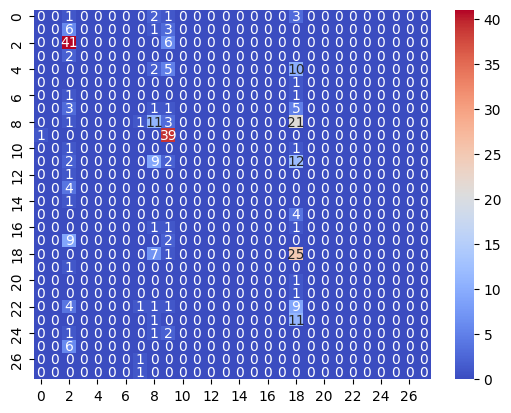

In [112]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot= True,cmap='coolwarm' )

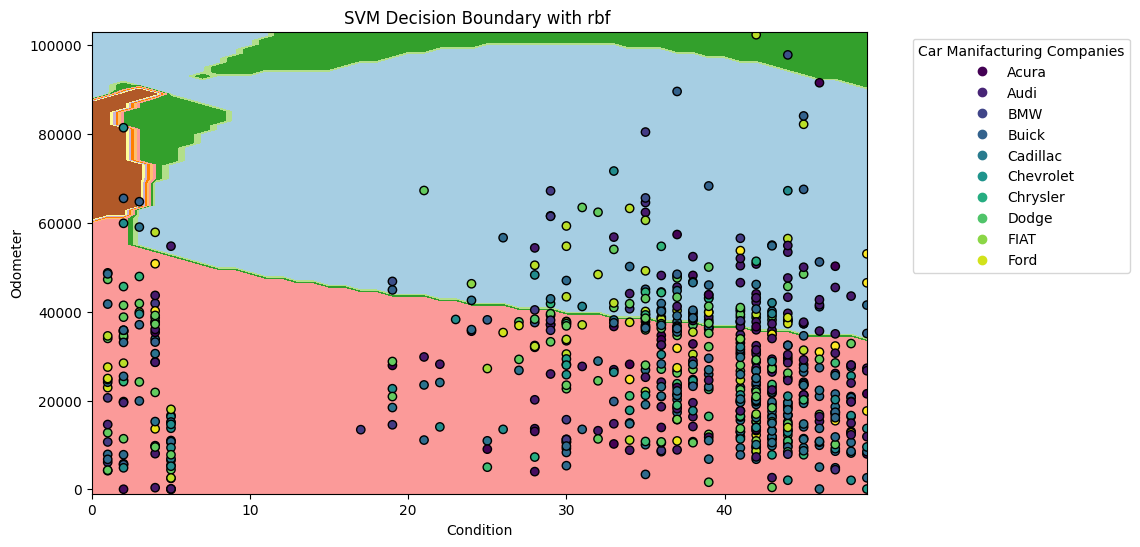

In [113]:
x_min, x_max = x_train['condition'].min() -1, x_train['condition'].max() + 1
y_min, y_max = x_train['odometer'].min() -1000 , x_train['odometer'].max() + 1000

xx, yy = np.meshgrid(np.arange(x_min, x_max,1), np.arange(y_min, y_max, 1000))

mmr_mean = x_train['mmr'].mean()


input_features = pd.DataFrame({
    'condition':xx.ravel(),
    'odometer':yy.ravel(),
    'mmr' : np.full(xx.ravel().shape, mmr_mean)
})


z= best_model.predict(input_features)
z = z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, z, cmap= plt.cm.Paired, )

scatter = plt.scatter(x_train['condition'], x_train['odometer'],c =y_train, edgecolors='k', marker='o')

plt.xlabel('Condition')
plt.ylabel('Odometer')
plt.title(f"SVM Decision Boundary with {best_param['svc__kernel']} ")

handles, labels = scatter.legend_elements()
unique_labels = le.inverse_transform(np.unique(y_train))
plt.legend(handles, unique_labels, title= 'Car Manifacturing Companies', bbox_to_anchor=(1.05, 1), loc='upper left')

   
plt.show()